In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures,normalize,scale,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,f_regression,VarianceThreshold
from sklearn.svm import LinearSVC

In [5]:
df=pd.read_csv('scaled_mol_descriptors.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,916,917,918,919,920,921,922,923,924,925
0,-1.662001,-1.645229,-0.930692,-0.296486,-0.928046,-0.969644,-1.430600,-1.676225,-0.386834,-0.963967,...,-1.908635,0.639457,-1.924440,-0.689641,-1.666668,0.075148,-1.826473,-1.650044,-1.706456,-1.783576
1,-1.538815,-1.167656,-0.930692,-0.296486,-0.928046,-0.969644,-1.641993,-1.468434,0.072934,-1.492833,...,-1.482234,0.716068,-1.353229,-0.483329,-1.505431,1.116574,-1.214636,-1.495653,-1.423619,-1.373175
2,-0.468281,-0.641377,-0.930692,-0.296486,0.823832,1.088729,-0.373636,-0.637269,-0.846602,-0.082524,...,0.049315,0.662352,0.190704,0.129971,-0.961044,-0.931145,-0.296879,-0.337716,-0.197991,-0.731924
3,-0.457413,-0.673263,-0.930692,-0.296486,0.604847,0.471217,-0.585029,-0.637269,-0.846602,-0.435101,...,-0.010138,0.801244,0.115288,0.207520,-0.917287,-0.451133,-0.398852,-0.337716,-0.229417,-0.757574
4,0.660681,0.684283,-0.930692,-0.296486,-0.052107,0.059542,-0.162243,0.401687,2.831542,-0.611390,...,2.311100,0.745354,2.576738,0.986292,0.888371,1.622464,0.416931,1.129003,0.996210,-0.372823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,-0.829817,-0.212856,-0.930692,-0.296486,-2.022970,-1.998830,-0.585029,-0.637269,0.072934,-0.435101,...,-0.894611,0.728126,-0.788444,0.071496,-0.506826,0.269865,-0.500825,-0.878087,-0.826518,-0.321523
639,-0.639784,-0.051274,-0.930692,-0.296486,-2.022970,-1.998830,-0.267940,-0.429478,0.072934,-0.082524,...,-0.815161,0.728126,-0.739440,0.202599,-0.301003,-0.048940,-0.398852,-0.723695,-0.700813,-0.090673
640,-0.490017,-0.060531,-0.930692,-0.296486,-1.147031,-0.969644,-0.585029,-0.429478,-0.386834,-0.611390,...,-0.074207,0.728126,0.085651,0.274415,-0.448176,0.372885,0.009040,-0.414912,-0.260844,-0.218923
641,-0.495610,-0.212779,-0.930692,-0.296486,-0.928046,-0.969644,-0.690725,-0.429478,1.452238,-0.787678,...,-0.374756,0.722157,-0.372581,0.241350,0.153394,1.706513,-0.500825,-0.492108,-0.543681,-0.475424


In [6]:
# Separating out the X variable

X=df
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,916,917,918,919,920,921,922,923,924,925
count,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,...,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02
mean,-1.033215e-15,-4.972694e-16,1.657565e-17,2.210086e-17,3.315129e-17,9.945388e-17,-2.486347e-17,-1.989078e-16,-1.326052e-16,1.533247e-16,...,2.519498e-15,1.933825e-16,-6.320847e-15,6.243494e-16,2.928364e-16,-1.685191e-16,2.762608e-16,3.480886e-16,8.287824e-17,1.989078e-16
std,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,...,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00
min,-2.175373e+00,-2.013309e+00,-9.306918e-01,-2.964862e-01,-3.336878e+00,-3.233854e+00,-1.853386e+00,-2.091808e+00,-2.225906e+00,-1.669121e+00,...,-3.010599e+00,-1.330678e+00,-3.053363e+00,-2.288734e+00,-2.298016e+00,-2.450218e+00,-2.132392e+00,-2.190415e+00,-2.146425e+00,-1.886176e+00
25%,-6.567110e-01,-6.269106e-01,-9.306918e-01,-2.964862e-01,-7.090610e-01,-7.638067e-01,-5.850289e-01,-6.372694e-01,-8.466024e-01,-6.113897e-01,...,-6.323408e-01,-1.330678e+00,-6.470048e-01,-7.705076e-01,-6.313747e-01,-7.374665e-01,-7.047710e-01,-6.464994e-01,-6.379598e-01,-7.190990e-01
50%,-1.991636e-05,-6.484002e-02,-9.306918e-01,-2.964862e-01,-5.210679e-02,5.954235e-02,-5.654677e-02,-1.389583e-02,-3.868344e-01,-8.252390e-02,...,6.665407e-03,6.623519e-01,2.569513e-02,2.256189e-03,-6.931248e-03,-1.217405e-01,9.039593e-03,-2.893340e-02,-4.085914e-02,-3.937263e-02
75%,5.499464e-01,5.064093e-01,9.997431e-01,-2.964862e-01,6.048474e-01,4.712169e-01,3.662390e-01,6.094778e-01,5.327017e-01,4.463419e-01,...,6.644788e-01,7.397200e-01,6.091710e-01,7.216732e-01,5.503353e-01,6.541415e-01,6.208773e-01,5.886326e-01,6.033811e-01,5.826411e-01
max,1.163535e+01,1.348296e+01,2.930178e+00,6.165907e+00,2.575710e+00,2.529590e+00,1.643210e+01,1.245358e+01,7.429222e+00,1.684118e+01,...,4.915014e+00,1.098765e+00,4.321429e+00,6.515378e+00,1.244226e+01,4.113045e+00,1.132804e+01,1.085567e+01,1.017270e+01,1.260610e+01


In [7]:
#Separating out the Y variable 

df1=pd.read_csv('pIC50+something_dataframe.csv')
y=df1.pIC50
y

0      4.782516
1      4.649752
2      3.698970
3      3.698970
4      4.000000
         ...   
638    5.000000
639    5.000000
640    5.000000
641    5.000000
642    7.899974
Name: pIC50, Length: 643, dtype: float64

In [8]:
# Weeding out Features with low variance 

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X_pd=pd.DataFrame(X)
X_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,916,917,918,919,920,921,922,923,924,925
count,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,...,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02,6.430000e+02
mean,-1.033215e-15,-4.972694e-16,1.657565e-17,2.210086e-17,3.315129e-17,9.945388e-17,-2.486347e-17,-1.989078e-16,-1.326052e-16,1.533247e-16,...,2.519498e-15,1.933825e-16,-6.320847e-15,6.243494e-16,2.928364e-16,-1.685191e-16,2.762608e-16,3.480886e-16,8.287824e-17,1.989078e-16
std,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,...,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00,1.000779e+00
min,-2.175373e+00,-2.013309e+00,-9.306918e-01,-2.964862e-01,-3.336878e+00,-3.233854e+00,-1.853386e+00,-2.091808e+00,-2.225906e+00,-1.669121e+00,...,-3.010599e+00,-1.330678e+00,-3.053363e+00,-2.288734e+00,-2.298016e+00,-2.450218e+00,-2.132392e+00,-2.190415e+00,-2.146425e+00,-1.886176e+00
25%,-6.567110e-01,-6.269106e-01,-9.306918e-01,-2.964862e-01,-7.090610e-01,-7.638067e-01,-5.850289e-01,-6.372694e-01,-8.466024e-01,-6.113897e-01,...,-6.323408e-01,-1.330678e+00,-6.470048e-01,-7.705076e-01,-6.313747e-01,-7.374665e-01,-7.047710e-01,-6.464994e-01,-6.379598e-01,-7.190990e-01
50%,-1.991636e-05,-6.484002e-02,-9.306918e-01,-2.964862e-01,-5.210679e-02,5.954235e-02,-5.654677e-02,-1.389583e-02,-3.868344e-01,-8.252390e-02,...,6.665407e-03,6.623519e-01,2.569513e-02,2.256189e-03,-6.931248e-03,-1.217405e-01,9.039593e-03,-2.893340e-02,-4.085914e-02,-3.937263e-02
75%,5.499464e-01,5.064093e-01,9.997431e-01,-2.964862e-01,6.048474e-01,4.712169e-01,3.662390e-01,6.094778e-01,5.327017e-01,4.463419e-01,...,6.644788e-01,7.397200e-01,6.091710e-01,7.216732e-01,5.503353e-01,6.541415e-01,6.208773e-01,5.886326e-01,6.033811e-01,5.826411e-01
max,1.163535e+01,1.348296e+01,2.930178e+00,6.165907e+00,2.575710e+00,2.529590e+00,1.643210e+01,1.245358e+01,7.429222e+00,1.684118e+01,...,4.915014e+00,1.098765e+00,4.321429e+00,6.515378e+00,1.244226e+01,4.113045e+00,1.132804e+01,1.085567e+01,1.017270e+01,1.260610e+01


In [9]:
# Splitting into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

In [11]:
#Feature Selection using F_regression scores

# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=60)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [12]:
# Building models - starting with random forest regressor

model = RandomForestRegressor(n_estimators=100,oob_score = False,random_state=1)
model.fit(X_train_fs, y_train)
r2 = model.score(X_test_fs, y_test)


Random Forest Regressor

On training data : 
R_2 score:  0.9594586368728426
RMSE :  0.2908569936908037
On testing data : 
R_2 score:  0.8148339939217178
RMSE :  0.6498709238282395




/home/sanket/anaconda3/envs/mordred-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

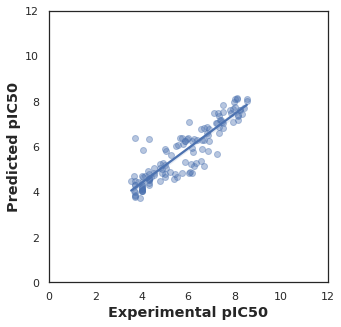

In [13]:
print("Random Forest Regressor\n")
y_pred_int = model.predict(X_train_fs)
print("On training data : ")
print('R_2 score: ' ,r2_score(y_train,y_pred_int))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,y_pred_int)))

y_pred_ext = model.predict(X_test_fs)
print("On testing data : ")
print('R_2 score: ' ,r2_score(y_test,y_pred_ext))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred_ext)))
print('\n')

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred_ext, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [14]:
# Gradient boosting regressor 

params = {'n_estimators': 650,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'max_features':24,
          'loss':'ls'}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train_fs, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=6, max_features=24,
                          min_samples_split=5, n_estimators=650)

Gradient Boosting Regressor

Train data: 
The root mean squared error (RMSE) :  0.13300792260001784
R_2 score :  0.9915219817723728
Test data -
The root mean squared error (RMSE) :  0.6057326647928456
R_2 score :  0.8391322325967042


/home/sanket/anaconda3/envs/mordred-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

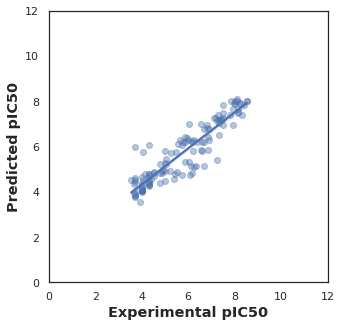

In [15]:
y_pred_ext=reg.predict(X_test_fs)
y_pred_int=reg.predict(X_train_fs)
print('Gradient Boosting Regressor\n')
print('Train data: ')
print("The root mean squared error (RMSE) : ",np.sqrt(mean_squared_error(y_train,y_pred_int)))
print('R_2 score : ',r2_score(y_train,y_pred_int))
print('Test data -')
print("The root mean squared error (RMSE) : ",np.sqrt(mean_squared_error(y_test,y_pred_ext)))
print('R_2 score : ',r2_score(y_test,y_pred_ext))

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred_ext, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Linear Regression Model

On training data
R_2 Score :  0.7088309239035885
RMSE :  0.779476383761301
On testing data
R_2 Score :  0.6664764262232505
RMSE :  0.8721872720980447


/home/sanket/anaconda3/envs/mordred-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

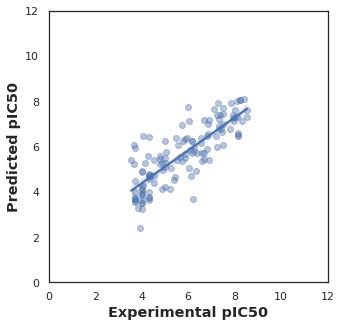

In [16]:
# Linear Regression Model

lr = linear_model.LinearRegression(fit_intercept=True)
lr.fit(X_train_fs, y_train)

y_pred_ext=lr.predict(X_test_fs)
y_pred_int=lr.predict(X_train_fs)

print("Linear Regression Model\n")
print('On training data')
print('R_2 Score : ',r2_score(y_train,y_pred_int))
print('RMSE : ', np.sqrt(mean_squared_error(y_train,y_pred_int)))

print('On testing data')
print('R_2 Score : ',r2_score(y_test,y_pred_ext))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_ext)))

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred_ext, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [17]:
#Lasso Regression

rr =  Pipeline([('poly', PolynomialFeatures()), 
                  ('model', Lasso(alpha=0.008))])
rr.fit(X_train_fs, y_train) 


/home/sanket/anaconda3/envs/mordred-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.426891694120414, tolerance: 0.1072565427164979
  positive)


Pipeline(steps=[('poly', PolynomialFeatures()), ('model', Lasso(alpha=0.008))])

/home/sanket/anaconda3/envs/mordred-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Lasso Regression Model

On training data : 
RMSE :  0.5707200639699432
R2_score :  0.8439062168623995
On test data : 
RMSE :  0.7979191511870001
R2_score :  0.7208582324989207


<function matplotlib.pyplot.show(close=None, block=None)>

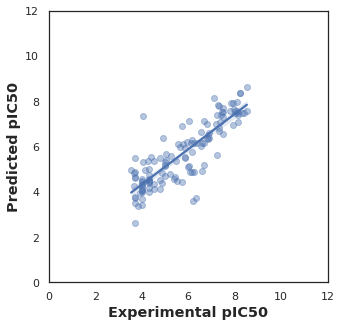

In [18]:
print("Lasso Regression Model\n")
pred_train_rr= rr.predict(X_train_fs)
print('On training data : ')
print('RMSE : ',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R2_score : ',r2_score(y_train, pred_train_rr))

print('On test data : ')
pred_test_rr= rr.predict(X_test_fs)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2_score : ',r2_score(y_test, pred_test_rr))

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, pred_test_rr, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show